<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/sub_clasases_codes/%EB%AC%B4%EC%84%B1%ED%95%9C_class_3%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = '/content/drive/MyDrive/tree_test/'

In [5]:
name = os.listdir(dir)
name

['잎을 무성하게 그린',
 '잎을 안 무성하게 그린',
 '잎이 없는',
 '잎이 큰',
 '잎이 안 큰',
 '윗쪽으로 뻗는',
 '윗쪽으로 안 뻗는',
 '열매있음',
 '열매없음',
 '그물 아닌',
 '꽃없음',
 '그물',
 '꽃있음']

In [6]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '잎을 무성하게 그린'))
_2.append(os.listdir(dir +'잎을 안 무성하게 그린'))
# _3.append(os.listdir(dir + '잎이 안 큰'))
# _4.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# _5.append(os.listdir(dir + '잎을 무성하게 그린'))
# _6.append(os.listdir(dir + '잎을 안 무성하게 그린'))

In [7]:
total_list = []
total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
total_list.append(os.listdir(dir +'잎을 안 무성하게 그린'))
# total_list.append(os.listdir(dir + '잎이 안 큰'))
# total_list.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
# total_list.append(os.listdir(dir + '잎을 안 무성하게 그린'))
# x = set(total_list)
print(total_list)

[['전체43.png', '잎2.png', '잎8.png', '잎7.png', '잎17.png', '잎21.png', '잎14.png', '잎19.png', '잎18.png', '잎46.png', '잎66.png', '잎99.png', '잎120.png', '잎127.png', '잎130.png', '잎138.png', '잎141.png', '잎163.png', '잎221.png', '잎222.png', '잎228.png', '잎244.png', '잎245.png', '잎248.png', '잎263.png', '잎264.png', '잎284.png', '잎302.png', '잎303.png', '잎313.png', '잎299.png', '잎309.png', '잎295.png', '잎300.png', '잎322.png', '잎326.png', '잎332.png', '잎333.png', '잎334.png', '잎336.png', '잎339.png', '잎342.png', '잎349.png', '잎350.png', '잎352.png', '잎356.png', '잎354.png', '잎360.png', '잎364.png', '잎362.png', '잎382.png', '잎388.png', '잎386.png', '잎391.png', '잎397.png', '잎401.png', '잎407.png', '잎475.png', '잎477.png', '잎495.png', '잎506.png', '잎504.png', '잎518.png', '잎519.png', '잎520.png', '잎522.png', '잎523.png', '잎528.png', '잎534.png', '잎535.png', '잎537.png', '잎539.png', '이

In [8]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['전체43.png', '잎2.png', '잎8.png', '잎7.png', '잎17.png', '잎21.png', '잎14.png', '잎19.png', '잎18.png', '잎46.png', '잎66.png', '잎99.png', '잎120.png', '잎127.png', '잎130.png', '잎138.png', '잎141.png', '잎163.png', '잎221.png', '잎222.png', '잎228.png', '잎244.png', '잎245.png', '잎248.png', '잎263.png', '잎264.png', '잎284.png', '잎302.png', '잎303.png', '잎313.png', '잎299.png', '잎309.png', '잎295.png', '잎300.png', '잎322.png', '잎326.png', '잎332.png', '잎333.png', '잎334.png', '잎336.png', '잎339.png', '잎342.png', '잎349.png', '잎350.png', '잎352.png', '잎356.png', '잎354.png', '잎360.png', '잎364.png', '잎362.png', '잎382.png', '잎388.png', '잎386.png', '잎391.png', '잎397.png', '잎401.png', '잎407.png', '잎475.png', '잎477.png', '잎495.png', '잎506.png', '잎504.png', '잎518.png', '잎519.png', '잎520.png', '잎522.png', '잎523.png', '잎528.png', '잎534.png', '잎535.png', '잎537.png', '잎539.png', '잎

In [9]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
# _3 = np.concatenate(_3).tolist()
# _4 = np.concatenate(_4).tolist()
# _5 = np.concatenate(_5).tolist()
# _6 = np.concatenate(_6).tolist()

In [10]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [11]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
# df3 = pd.DataFrame({
#     '_3' : _3
# })
# df4 = pd.DataFrame({
#     '_4' : _4
# })
# df5 = pd.DataFrame({
#     '_5' : _5
# })
# df6 = pd.DataFrame({
#     '_6' : _6
# })

In [12]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
# result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
# result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
# result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')
# result = pd.merge(result,df6, how='left', left_on='imgs', right_on='_6')

In [13]:
result = result.fillna(0)

In [14]:
result

,imgs,_1,_2
0,전체43.png,전체43.png,0
1,잎2.png,잎2.png,0
2,잎8.png,잎8.png,0
3,잎7.png,잎7.png,0
4,잎17.png,잎17.png,0
...,...,...,...
197,전체620.png,0,전체620.png
198,전체621.png,0,전체621.png
199,전체619.png,0,전체619.png
200,전체626.png,0,전체626.png


In [15]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)
# result['_4'] = result['_4'].apply(binary)
# result['_5'] = result['_5'].apply(binary)
# result['_6'] = result['_6'].apply(binary)

In [16]:
result

,imgs,_1,_2
0,전체43.png,1,0
1,잎2.png,1,0
2,잎8.png,1,0
3,잎7.png,1,0
4,잎17.png,1,0
...,...,...,...
197,전체620.png,0,1
198,전체621.png,0,1
199,전체619.png,0,1
200,전체626.png,0,1


In [17]:
result.columns = ['imgs','잎을 무성하게 그린', '잎을 안 무성하게 그린']

In [18]:
result1 = result.copy()

In [ ]:
# def chage(data):
#     if data == 1:
#         data = 0
#         return data
#     else:
#         data = 1
#         return data
# result1['잎을 무성하게 그린'] = result1['잎을 무성하게 그린'].apply(chage)

# result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)

In [ ]:
# def chage2(data):
#     if data == 1:
#         data = 2
#         return data
#     else:
#         data = 0
#         return data
# result['잎을 안 무성하게 그린'] = result['잎을 안 무성하게 그린'].apply(chage2)

In [19]:
result1.iloc[101:120]

,imgs,잎을 무성하게 그린,잎을 안 무성하게 그린
101,전체1.png,0,1
102,전체3.png,0,1
103,전체10.png,0,1
104,전체11.png,0,1
105,전체24.png,0,1
106,전체20.png,0,1
107,전체34.png,0,1
108,전체62.png,0,1
109,전체88.png,0,1
110,전체84.png,0,1


In [20]:
data_1 = result1[['imgs','잎을 무성하게 그린']]
data_1.columns = ['imgs','잎']

In [21]:
data_1['잎'].value_counts()

1    101
0    101
Name: 잎, dtype: int64

In [22]:
import sklearn
data_merge2_shuffled = sklearn.utils.shuffle(data_1)

In [23]:
data_merge2_shuffled

,imgs,잎
39,잎336.png,1
168,잎438.png,0
131,전체364.png,0
143,잎100.png,0
52,잎386.png,1
...,...,...
89,전체775.png,1
94,전체781.png,1
2,잎8.png,1
190,잎560.png,0


In [45]:
data = data_merge2_shuffled

In [46]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=1, stratify=data['잎'])

In [47]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 161
Test  set rows: 41


In [54]:
IMAGE_PATH = '/content/drive/MyDrive/무성_total/'

In [55]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [56]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['잎'], drop_first=False)
    return X, y

In [57]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [60]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(161, 300, 300, 3)
(161, 2)
(41, 300, 300, 3)
(41, 2)


In [59]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [61]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.7 MB/s eta 0:00:00


In [62]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [78]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

In [79]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(2, activation='softmax')(base_model.layers[-2].output)

In [80]:
model = Model(inputs=base_model.input, outputs=net)

In [81]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [82]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 40  1080        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 40  160         ['stem_conv[0][0]']              
                                )                                                           

In [75]:
%mkdir /content/drive/MyDrive/models/
%mkdir /content/drive/MyDrive/models/위로뻗은/
%mkdir /content/drive/MyDrive/models/위로뻗은/check_point
checkpoint_path = "/content/drive/MyDrive/models/위로뻗은/check_point/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

mkdir: cannot create directory ‘/content/drive/MyDrive/models/’: File exists


In [83]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=10)
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=7*BATCH_SIZE)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    verbose=VERBOSE,
    validation_split=0.2,
    # callbacks=[early_stopping, cp_callback]
)

Epoch 1/50
16/16 [==============================] - 59s 284ms/step - loss: 0.5886 - accuracy: 0.7578 - val_loss: 517.6337 - val_accuracy: 0.5152
Epoch 2/50
16/16 [==============================] - 1s 82ms/step - loss: 0.2893 - accuracy: 0.8672 - val_loss: 101.7383 - val_accuracy: 0.5455
Epoch 3/50
16/16 [==============================] - 1s 82ms/step - loss: 0.2184 - accuracy: 0.9219 - val_loss: 165.4782 - val_accuracy: 0.4848
Epoch 4/50
16/16 [==============================] - 1s 82ms/step - loss: 0.4768 - accuracy: 0.8203 - val_loss: 26.1443 - val_accuracy: 0.7273
Epoch 5/50
16/16 [==============================] - 1s 82ms/step - loss: 0.2087 - accuracy: 0.9375 - val_loss: 2.4537 - val_accuracy: 0.7273
Epoch 6/50
16/16 [==============================] - 1s 84ms/step - loss: 0.2846 - accuracy: 0.9062 - val_loss: 2.9003 - val_accuracy: 0.6970
Epoch 7/50
16/16 [==============================] - 1s 84ms/step - loss: 0.2442 - accuracy: 0.8984 - val_loss: 1.7128 - val_accuracy: 0.7576
Epoc

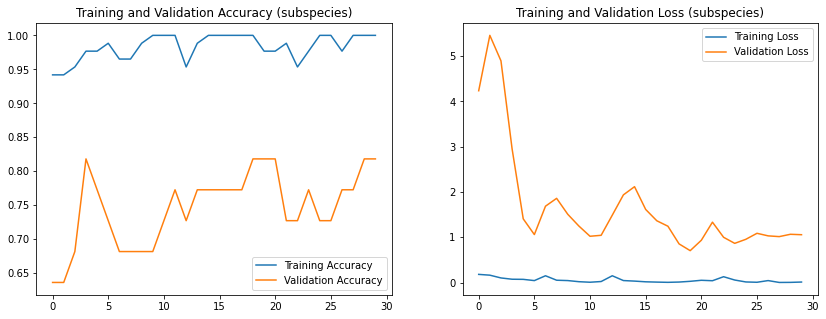

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 227ms/step - loss: 1.7553 - accuracy: 0.7500


[1.7552744150161743, 0.75]

In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
np.argmax(predictions[2])

2

In [ ]:
y_test

,0,1,2
123,0,0,1
41,1,0,0
72,0,1,0
74,0,1,0
122,0,0,1
93,0,1,0
99,0,0,1
53,1,0,0
92,0,1,0
125,0,0,1


In [ ]:

%cd /content/drive/MyDrive/models/잎/
from keras.models import load_model
model.save('잎_model.h5')

/content/drive/MyDrive/models/잎
